<a href="https://colab.research.google.com/github/moreirarodrigo-eo/Data_mining_Neoplasias_Censo_Agro/blob/main/Data_mining_Neoplasias_Censo_Agro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://mljar.com/blog/feature-importance-xgboost/#:~:text=Permutation%20Based%20Feature%20Importance%20(with%20scikit%2Dlearn%20)&text=It%20is%20possible%20because%20Xgboost,change%20in%20the%20model's%20performance.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor
#!pip install shap
import shap

In [ ]:
df_all = pd.read_excel('/content/drive/MyDrive/Python/dados_neoplasias_censo_agro/censo_agro_neoplasias_ALL.xlsx')
df_all

,OBJECTID,MUNICIPIO_uf,UF,GEO,Shape_Leng,Shape_Area,V1,V2,V3,V4,...,V32,V33,V34,V35,V36,V37,V38,V39,NEOP_2017,NEOPLASIAS_2008_2022
0,3255,Abadia de Goiás - GO,GO,5200050,0.549846,0.012093,177,54.0165,2.86441,366.2370,...,1.493960,0.564972,25.98870,0.863203,21.468900,11.86440,53.6723,24.8588,26.0,509
1,2961,Abadia dos Dourados - MG,MG,3100104,1.716263,0.075903,1070,57.6798,2.80561,90.2221,...,1.156480,0.000000,19.71960,3.716890,0.841121,11.30840,82.7103,58.2243,13.0,402
2,726,Abadiânia - GO,GO,5200100,1.634947,0.087810,995,77.2677,2.78894,241.6870,...,1.209140,2.914570,23.81910,2.408240,5.427140,28.64320,52.0603,42.5126,17.0,478
3,314,Abaeté - MG,MG,3100203,2.256489,0.157414,983,158.0120,3.29908,39.5810,...,1.103870,1.119020,32.24820,1.328680,4.476090,26.55140,53.5097,39.0641,65.0,1026
4,5303,Abaetetuba - PA,PA,1500107,1.756351,0.130591,9410,10.0017,3.67290,17943.1000,...,3.056910,0.053135,1.12658,0.125420,1.764270,6.63124,84.6121,70.9564,133.0,6173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,3982,Xique-Xique - BA,BA,2933604,4.820360,0.435549,2453,30.2060,3.40440,5745.3400,...,0.899658,34.569900,5.04967,1.900260,15.976800,4.28047,88.7077,57.8883,54.0,1918
5566,3796,Zabelê - PB,PB,2517407,0.435835,0.008734,266,36.1185,2.60902,0.0000,...,1.264050,82.706800,1.87970,1.595590,16.917300,15.41350,80.4511,56.7669,5.0,116
5567,3418,Zacarias - SP,SP,3557154,0.723911,0.027486,156,150.9670,3.64103,518.0490,...,1.635470,0.641026,36.53850,5.650100,3.846150,18.58970,61.5385,20.5128,17.0,269
5568,5177,Zé Doca - MA,MA,2114007,3.056336,0.172873,877,81.8803,4.24287,0.0000,...,0.891788,0.114025,37.33960,3.111130,3.033840,4.44698,77.1950,59.2930,70.0,2148


In [ ]:
X = pd.DataFrame(df_all.drop(['OBJECTID',	'MUNICIPIO_uf',	'UF',	'GEO',	'Shape_Leng',	'Shape_Area', 'NEOPLASIAS_2008_2022', 'NEOP_2017'], axis = 1))
y = pd.DataFrame(df_all, columns =['NEOPLASIAS_2008_2022'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

[18:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39']

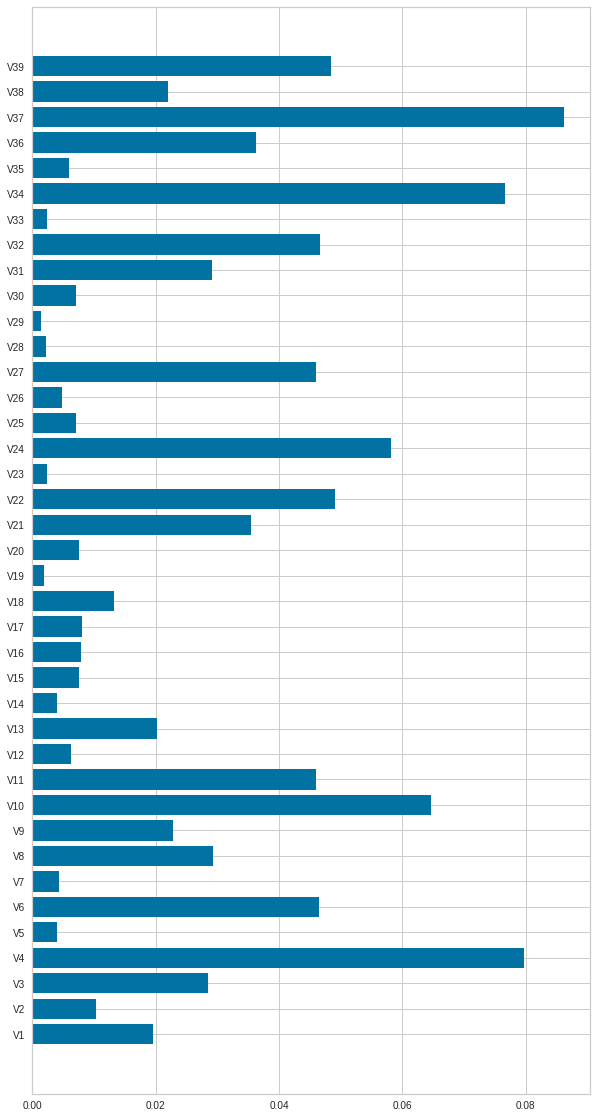

In [ ]:
X_train_feature_names = list(X_train.columns)

xgb.feature_importances_
plt.figure(figsize=(10,20))
plt.barh(X_train_feature_names, xgb.feature_importances_)
X_train_feature_names

Text(0.5, 0, 'Xgboost Feature Importance')

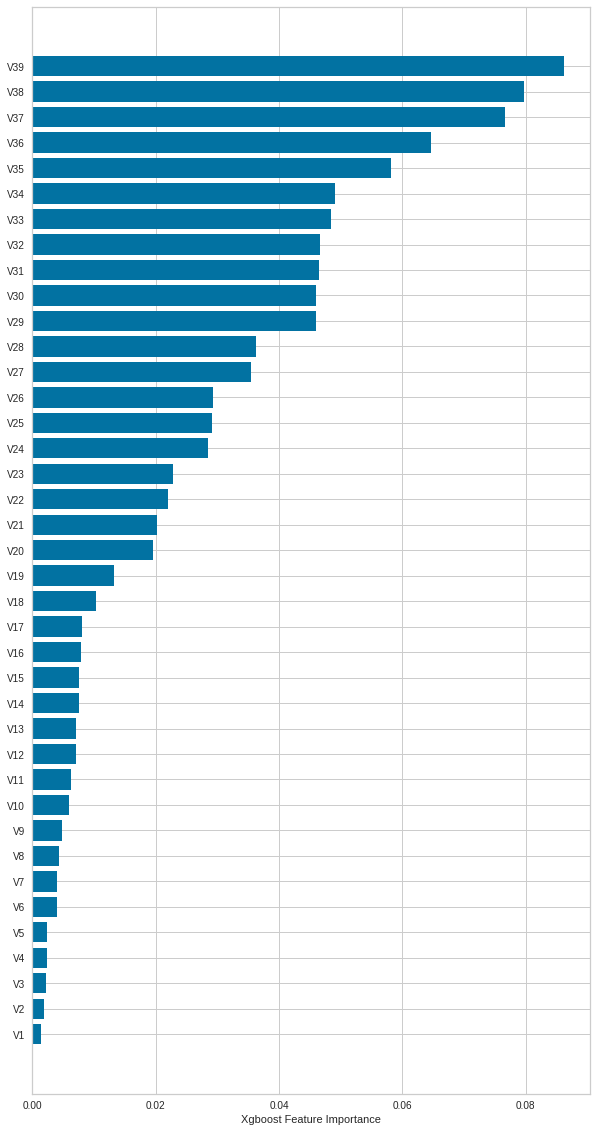

In [ ]:
sorted_idx = xgb.feature_importances_.argsort()
plt.figure(figsize=(10,20))
plt.barh(X_train_feature_names, xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
perm_importance = permutation_importance(xgb, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train_feature_names[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Permutation Importance")

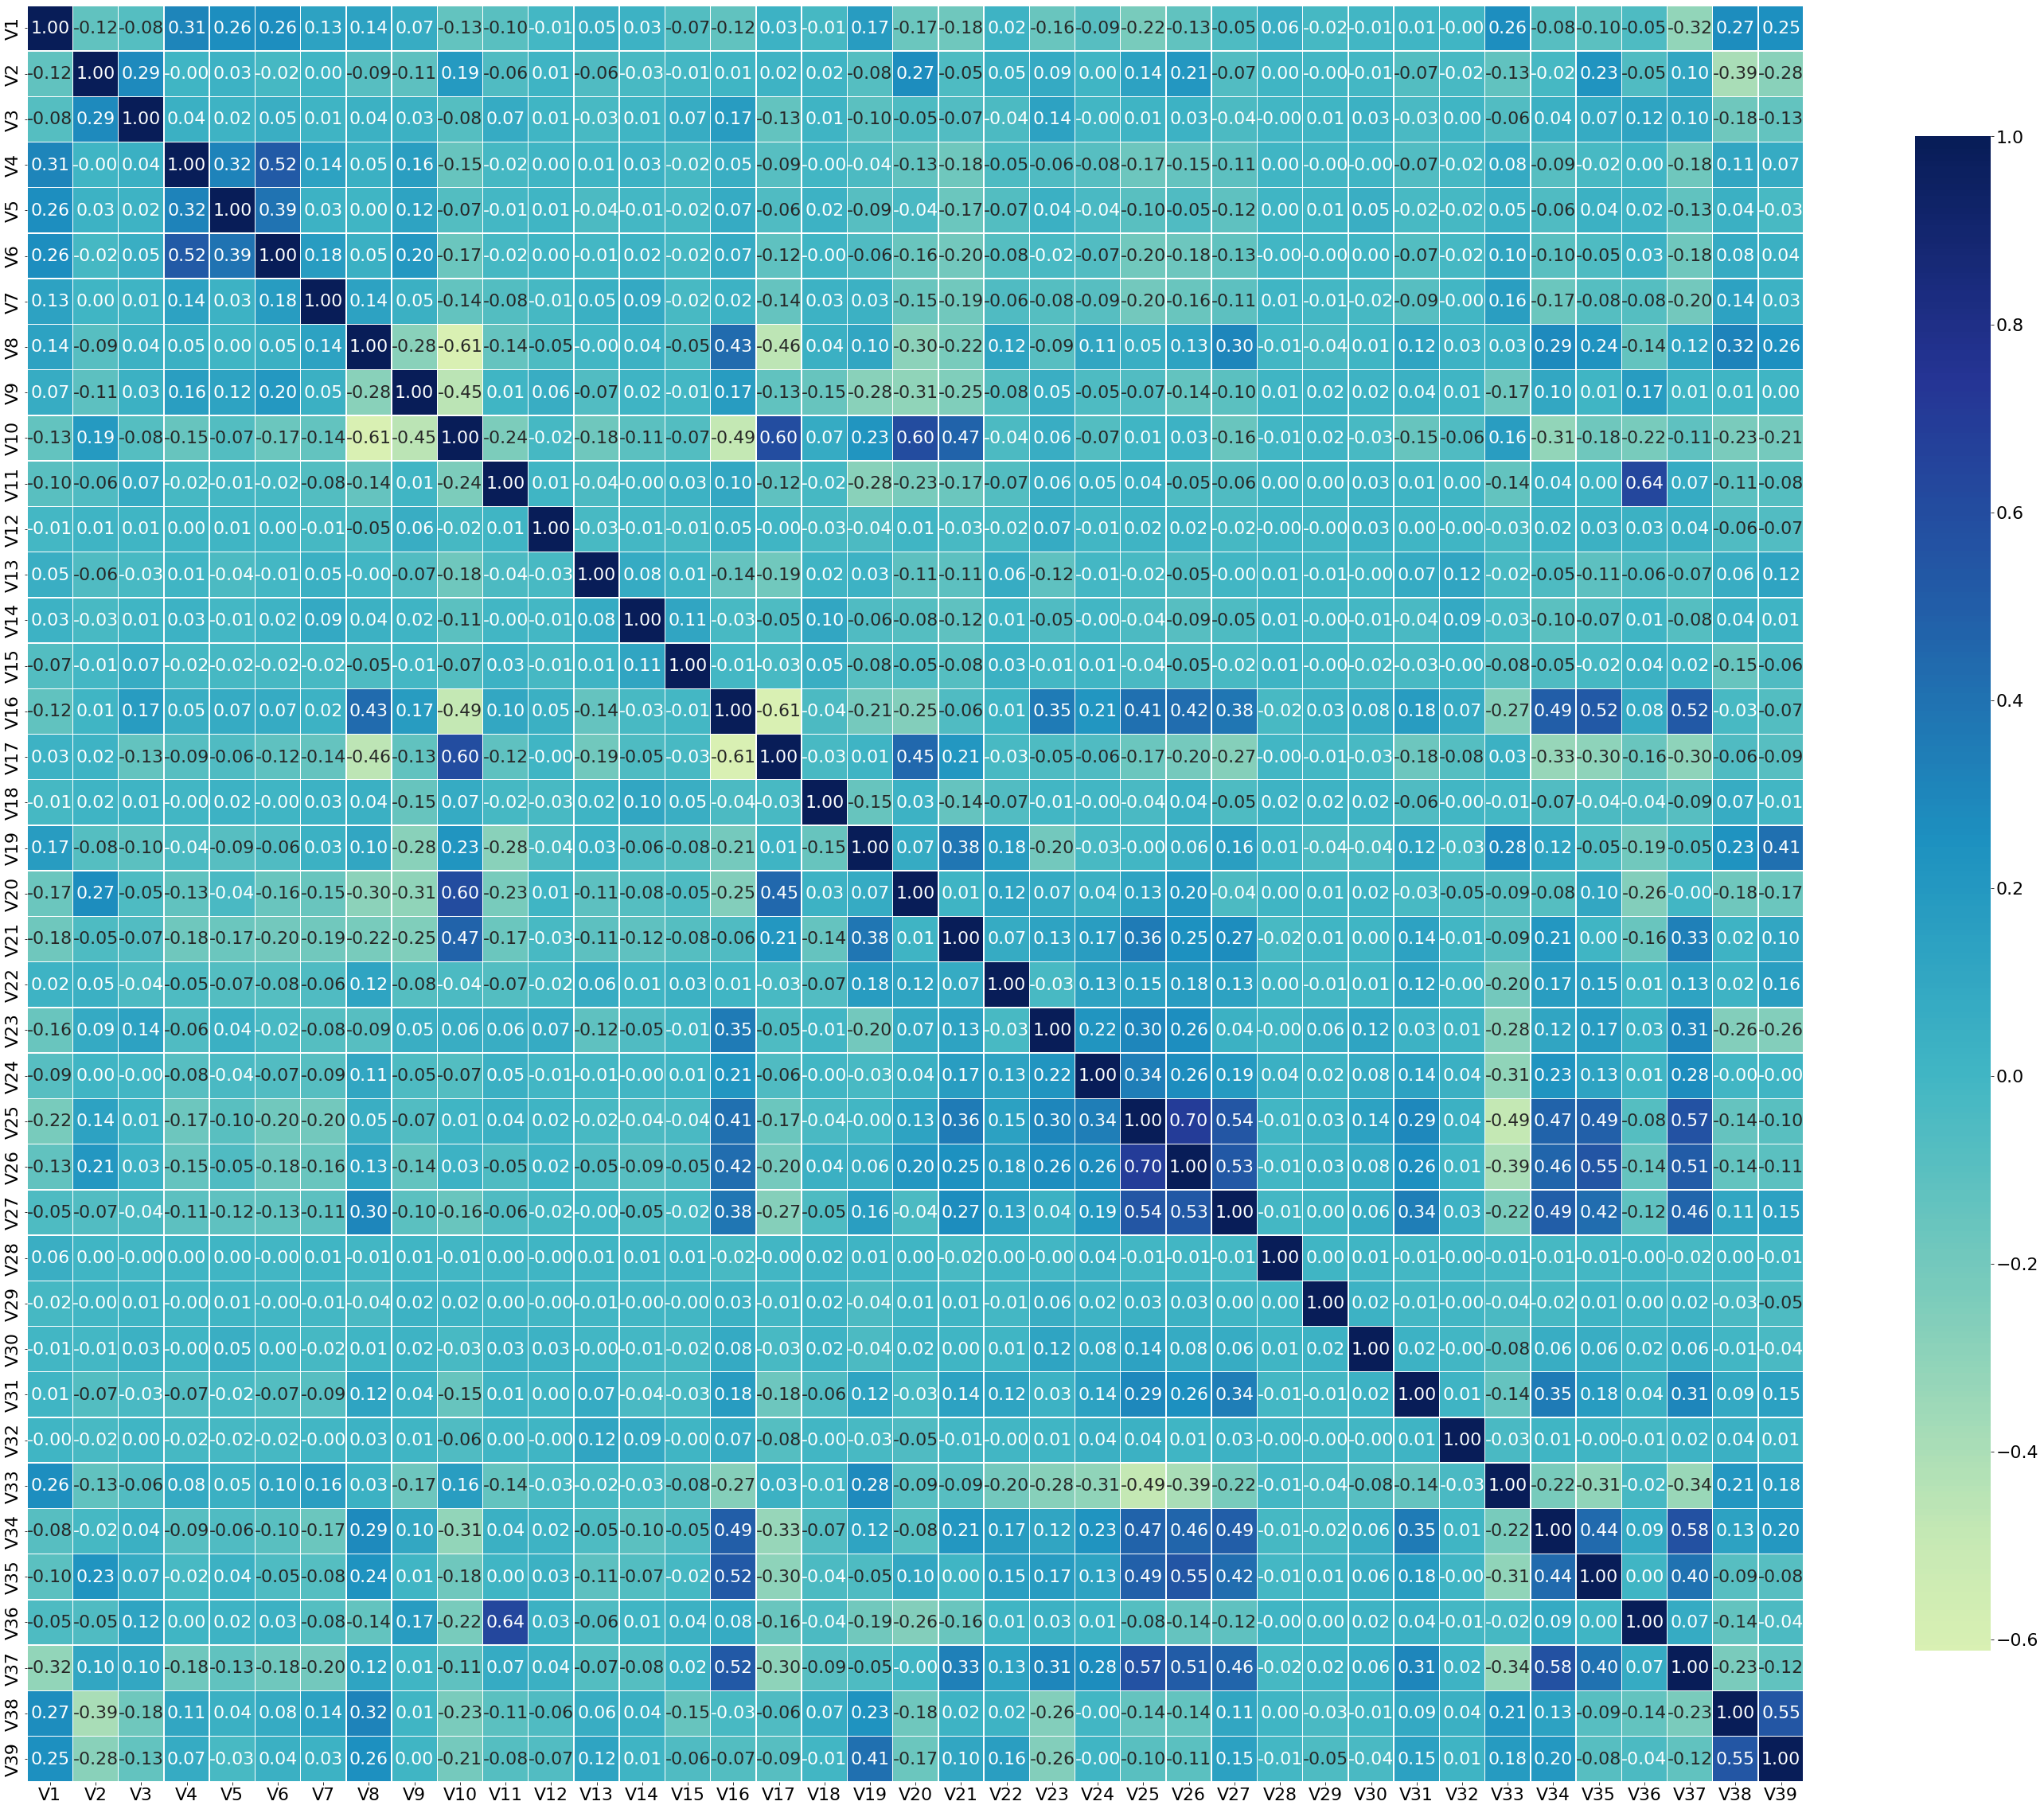

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(50,50))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.rcParams.update({'font.size': 50})
    plt.show();
correlation_heatmap(X_train[X_train_feature_names])

In [ ]:
from yellowbrick.features import Rank2D
fig, ax = plt.subplots(figsize=(15, 15))
pcv = Rank2D(
features = df_all.drop(['OBJECTID',	'MUNICIPIO_uf',	'UF',	'GEO',	'Shape_Leng',	'Shape_Area', 'NEOPLASIAS_2008_2022', 'NEOP_2017'], axis = 1).columns, algorithm="spearman"
)
pcv.fit(df_all.drop(['OBJECTID',	'MUNICIPIO_uf',	'UF',	'GEO',	'Shape_Leng',	'Shape_Area', 'NEOPLASIAS_2008_2022', 'NEOP_2017'], axis = 1))
pcv.transform(df_all.drop(['OBJECTID',	'MUNICIPIO_uf',	'UF',	'GEO',	'Shape_Leng',	'Shape_Area', 'NEOPLASIAS_2008_2022', 'NEOP_2017'], axis = 1))
pcv.poof()

In [ ]:
df_all[df_all.columns[1:]].corr(method='spearman')['NEOPLASIAS_2008_2022'][:-2]

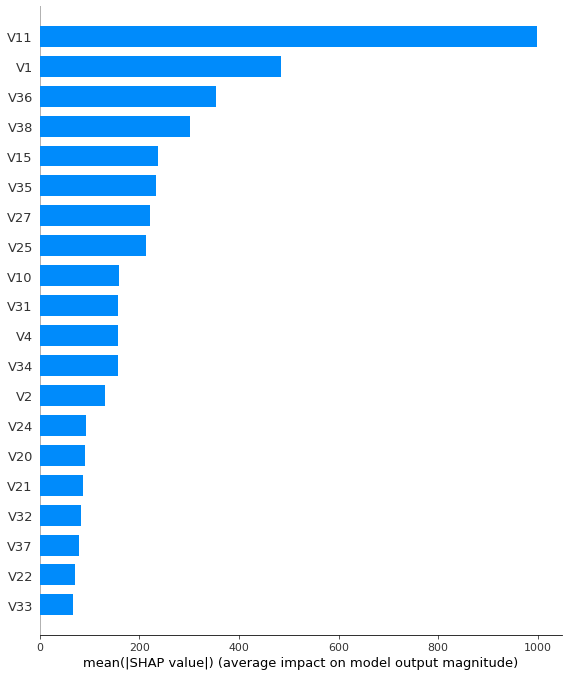

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

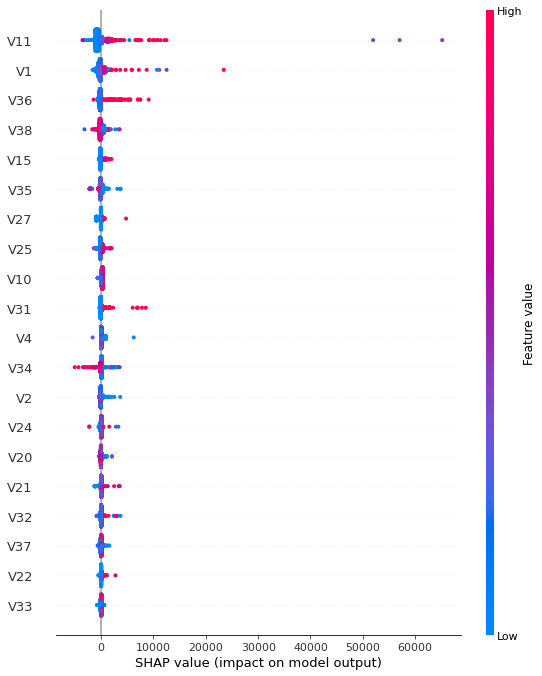

In [ ]:
shap.summary_plot(shap_values, X_test)


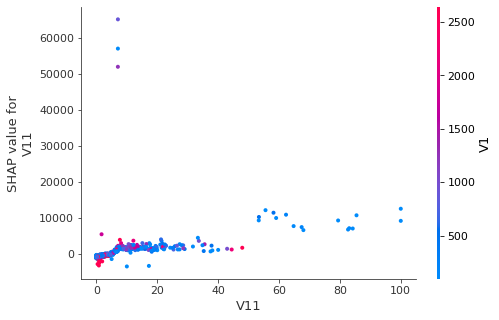

In [ ]:
shap.dependence_plot("V11", shap_values, X_test)

In [ ]:

# Predict the model
pred = xgb.predict(X_test)
 
# RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  15230.184532


In [ ]:
#predict Neplasias X Horticultura

df_hort = pd.DataFrame(df_all['V11'])
df_hort
df_neoplasias = pd.DataFrame(df_all['NEOPLASIAS_2008_2022'])
df_neoplasias

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_hort, df_neoplasias, test_size=0.3, random_state=42)

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.06, gamma=1, subsample=1, objective='reg:squarederror', booster='gblinear', n_jobs=-1)
xgb_model.fit(X_train, y_train)

print(xgb_model.coef_)

[172.525]


In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("A cada 1% de aumento na atividade de horticultura no Brasil, observa-se um aumento de",linear_model.coef_, "casos de câncer a nível nacional")


A cada 1% de aumento na atividade de horticultura no Brasil, observa-se um aumento de [[175.39927446]] casos de câncer a nível nacional


In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas